<a href="https://colab.research.google.com/github/ranjani5/Boston-house-data-prediction/blob/main/MLR(boston_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Boston housedata

In [ ]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#import statsmodels.api as sm

In [ ]:
# Importing dataset
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
# list of features/variables in boston
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
#Dataset description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Converting an array of data into a pandas dataframes
df = pd.DataFrame(boston.data)

In [ ]:
#to see first few observations
df.head()  #returns first 5 observations

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Adding column names in our dataframe
df.columns = boston.feature_names
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [ ]:
#Adding target variable in our dataframe
df['PRICE'] = boston.target

In [ ]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [ ]:
# Shape of dataframe/ returns (no of observations x no of features)
df.shape

(506, 14)

In [ ]:
#gives information about all features in our dataframe 
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [ ]:
#To see statistical description of data
from pandas import set_option 
set_option('precision', 2)  # it gives only two num after decimal pt
df.describe(include = 'all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [ ]:
#To check if our dataset contains any null/NA value
#pd.isnull(df)
df.isnull().values.any() # to identify missing values we use this command

False

In [ ]:
#If we NA values exist, then to find total count of NA values
df.isnull().sum()
#df.isnull().values.sum() #count of missing values we use this command

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Descriptive Stats

In [ ]:
# correlation between variables
#set_option('precision', 2)
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


# Data Visualization

# Univariate

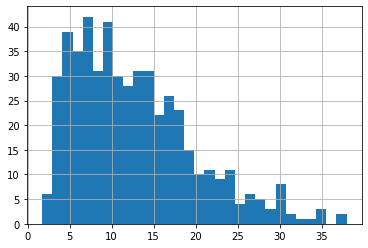

In [ ]:
# To plot histogram of a particular variable
df.LSTAT.hist(bins = 30)
plt.show()                   #+vely skewed
#df['LSTAT'].hist()

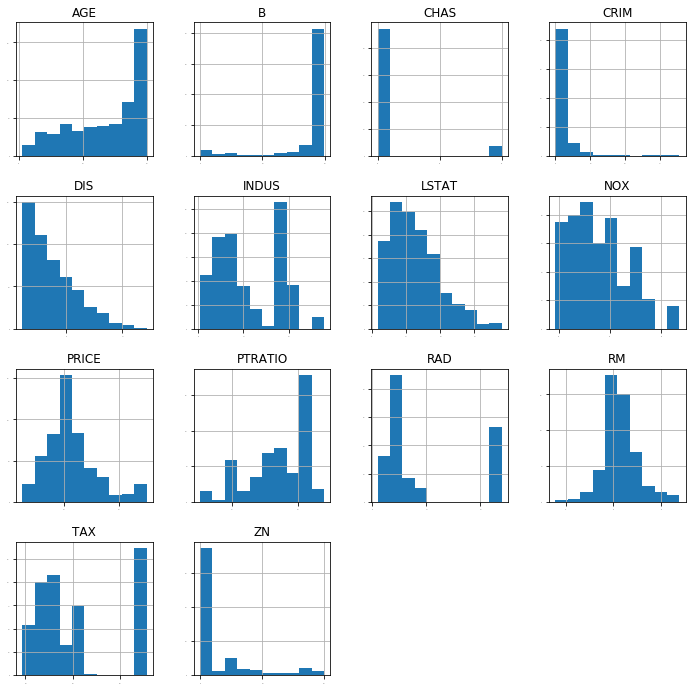

In [ ]:
# to plot histograms (to check distribution of variables) of all the variables in a dataframe
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(12,12))
plt.show()

age is -vely skewed i.e majority of plp are elderly
chas is binary values
crime raye is 0
RM is approx symetrical
INDUS is binodal data due to two grps


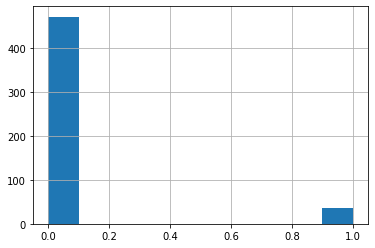

In [ ]:
df.CHAS.hist()
plt.show()

Here, by observing distribution of CHAS variable, we find that its a binary feature (not a numeric feature as given in data description). We can confirm same by observing statistical description.

In [ ]:
#converting CHAS variable to categorical/qualitative type
df.CHAS =df.CHAS.astype('category')
df.CHAS

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: category
Categories (2, float64): [0.0, 1.0]

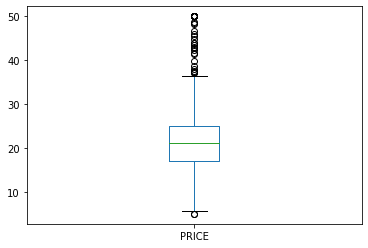

In [ ]:
df.PRICE.plot(kind='box', legend = True)
plt.show()

finding same as density plt and outliers are present in this variable distribution will be

In [ ]:
# density plot(to check the distribution/shape of variables)
df.['PRICE'].plot(kind='density', legend = True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-23-4265b8e46cc8>, line 2)

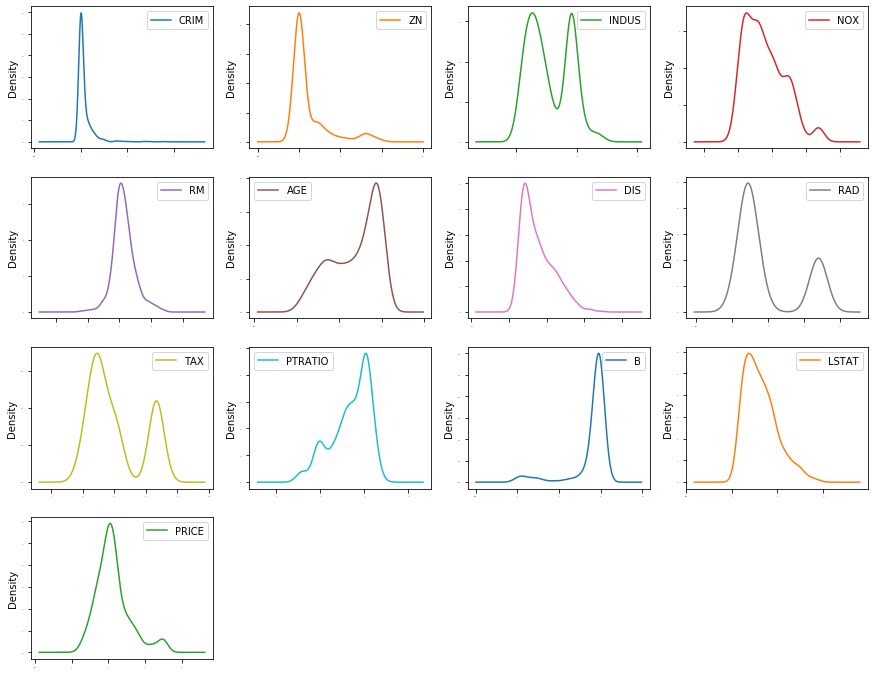

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

crime has out liers
zn also having outliers
nox is rs
tax  is 
rm is sym
lstat moderately skewed
price variable is moderately skewed and it has few outliers at right tail

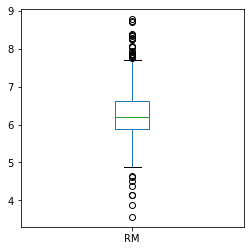

In [ ]:
# box and whisker plots(To check shape of variables and outliers in variables)
df.RM.plot(kind = 'box', figsize = (4, 4))
plt.show()

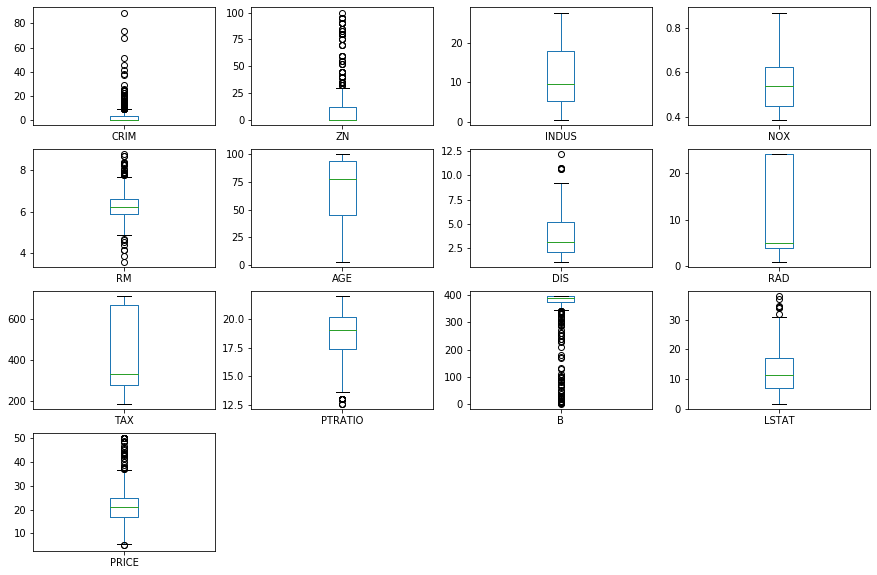

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        fontsize=10, figsize = (15, 10))
plt.show()

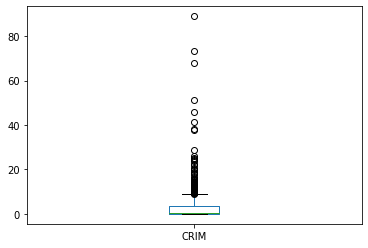

In [ ]:
df.CRIM.plot(kind = 'box')

In [ ]:
import seaborn as sns

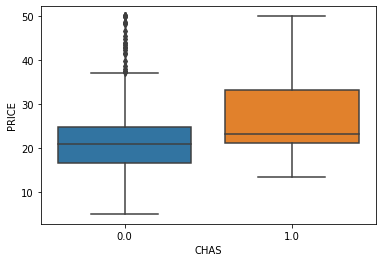

In [ ]:
sns.boxplot(y = df.PRICE, x = df.CHAS)

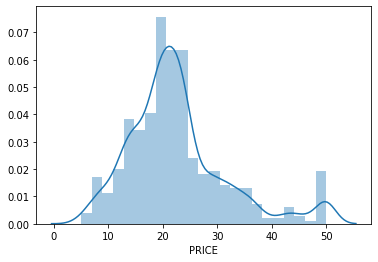

In [ ]:
#import seaborn as sns
sns.distplot(df.PRICE)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

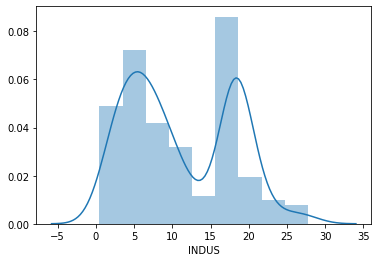

In [ ]:
sns.distplot(df.INDUS)
plt.show

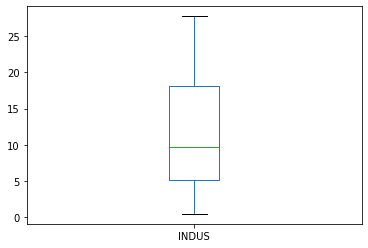

In [ ]:
df.INDUS.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

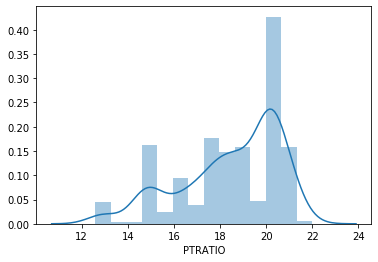

In [ ]:
sns.distplot(df.PTRATIO)
plt.show

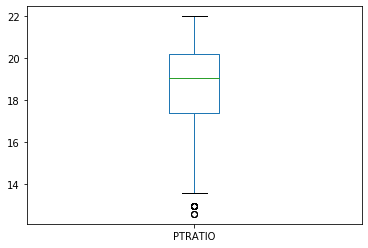

In [ ]:
df.PTRATIO.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

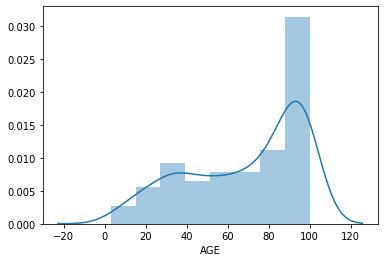

In [ ]:
sns.distplot(df.AGE)
plt.show

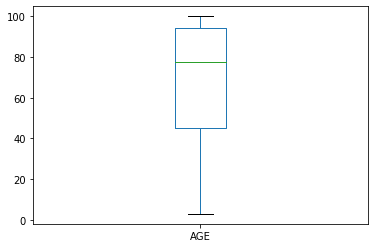

In [ ]:
df.AGE.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

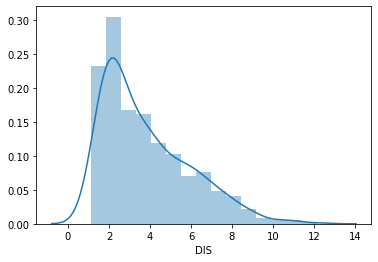

In [ ]:
sns.distplot(df.DIS)
plt.show

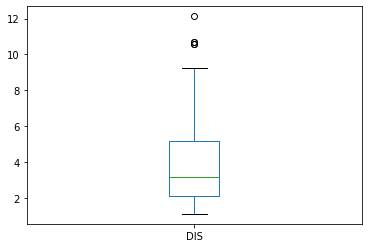

In [ ]:
df.DIS.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

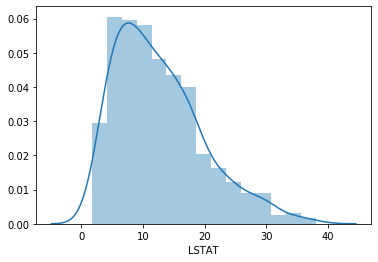

In [ ]:
sns.distplot(df.LSTAT)
plt.show

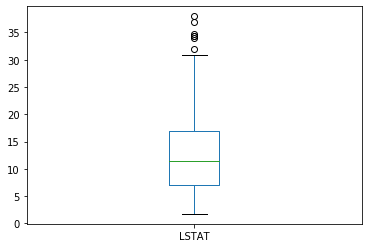

In [ ]:
df.LSTAT.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

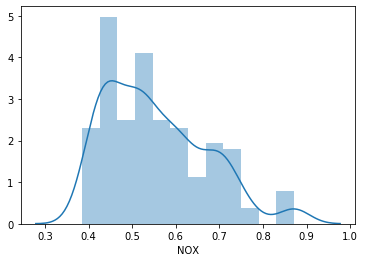

In [ ]:
sns.distplot(df.NOX)
plt.show

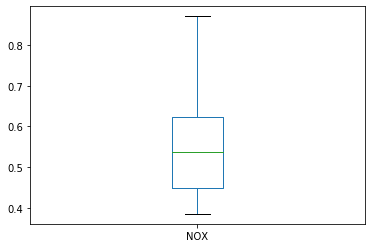

In [ ]:
df.NOX.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

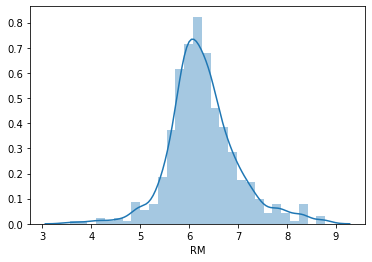

In [ ]:
sns.distplot(df.RM)
plt.show

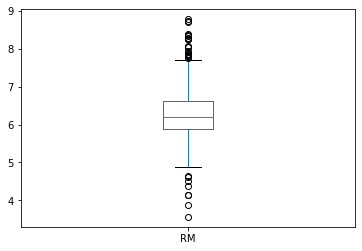

In [ ]:
df.RM.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

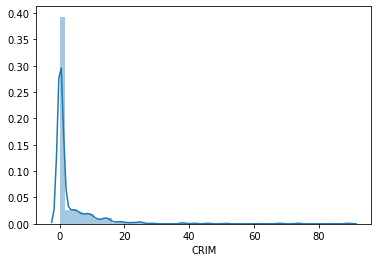

In [ ]:
sns.distplot(df.CRIM)
plt.show

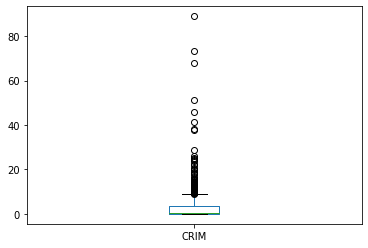

In [ ]:
df.CRIM.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

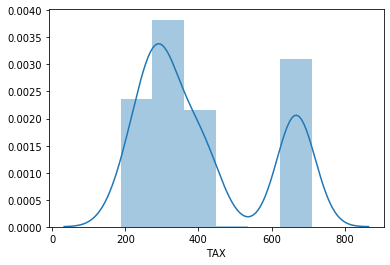

In [ ]:
sns.distplot(df.TAX)
plt.show

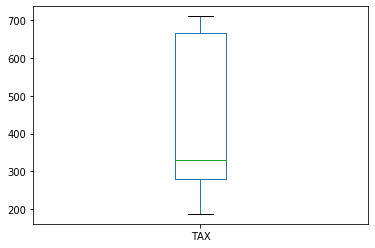

In [ ]:
df.TAX.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

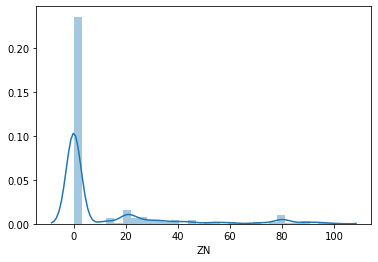

In [ ]:
sns.distplot(df.ZN)
plt.show

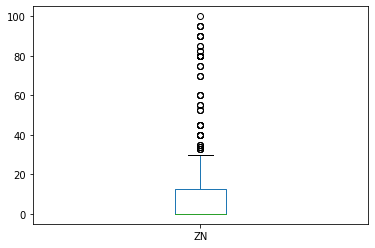

In [ ]:
df.ZN.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

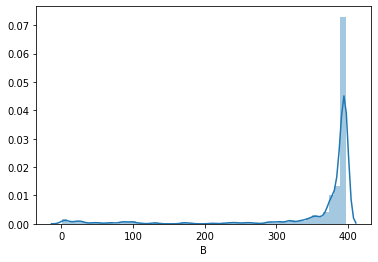

In [ ]:
sns.distplot(df.B)
plt.show

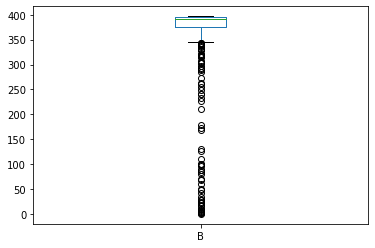

In [ ]:
df.B.plot(kind='box')
plt.show()

BIVARIATE

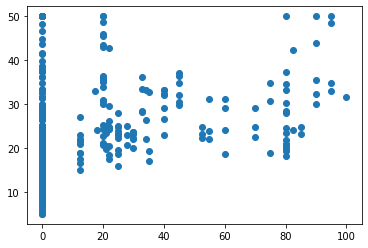

In [ ]:
plt.scatter(df.ZN,df.PRICE)
plt.show()

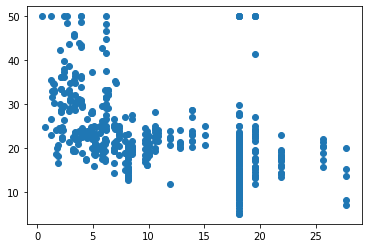

In [ ]:
plt.scatter(df.INDUS,df.PRICE)
plt.show()

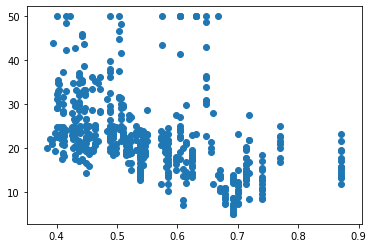

In [ ]:
plt.scatter(df.NOX,df.PRICE)
plt.show()

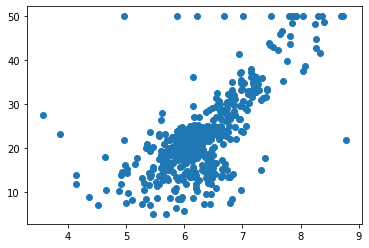

In [ ]:
plt.scatter(df.RM,df.PRICE)
plt.show()

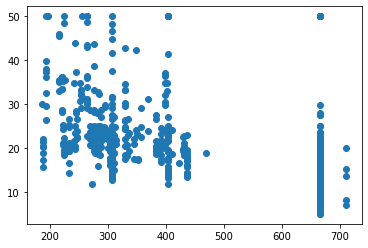

In [ ]:
plt.scatter(df.TAX,df.PRICE)
plt.show()

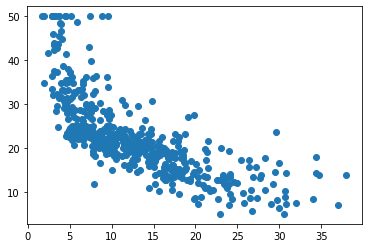

In [ ]:
plt.scatter(df.LSTAT,df.PRICE)
plt.show()

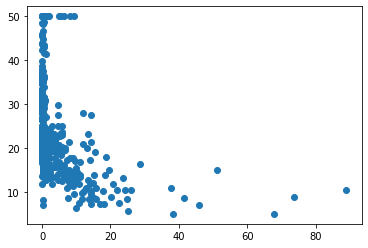

In [ ]:
plt.scatter(df.CRIM,df.PRICE)
plt.show()

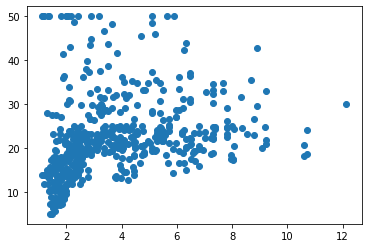

In [ ]:
plt.scatter(df.DIS,df.PRICE)
plt.show()

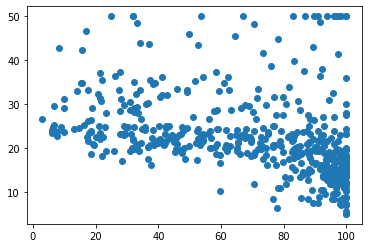

In [ ]:
plt.scatter(df.AGE,df.PRICE)
plt.show()

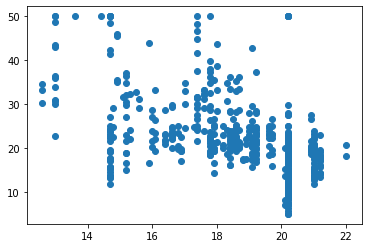

In [ ]:
plt.scatter(df.PTRATIO,df.PRICE)
plt.show()

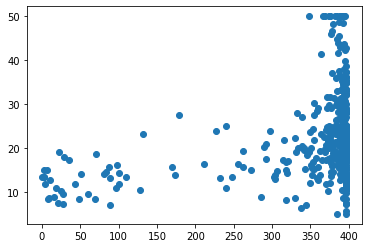

In [ ]:
plt.scatter(df.B,df.PRICE)
plt.show()

# Multivariate Data Visualizations

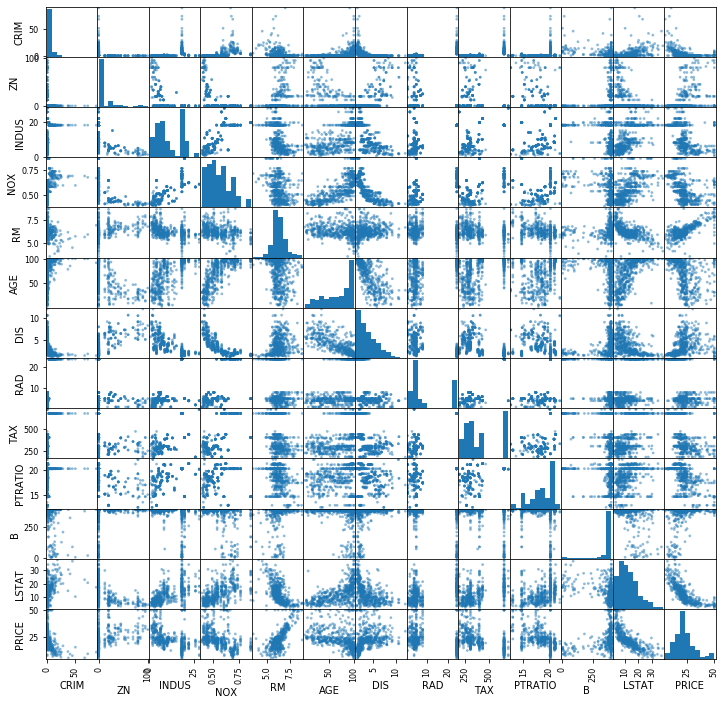

In [ ]:
# scatter plot matrix (to check inter-relationship between variables)
from pandas.plotting import scatter_matrix 
scatter_matrix(df, figsize = (12,12), s = 30)
plt.show()

In [ ]:
df1 = df[["LSTAT","RM", "CRIM", "PRICE"]]

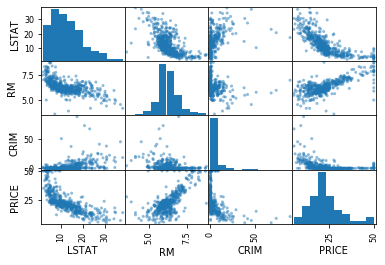

In [ ]:
scatter_matrix(df[["LSTAT","RM", "CRIM", "PRICE"]])
#scatter_matrix(df1)
plt.show()

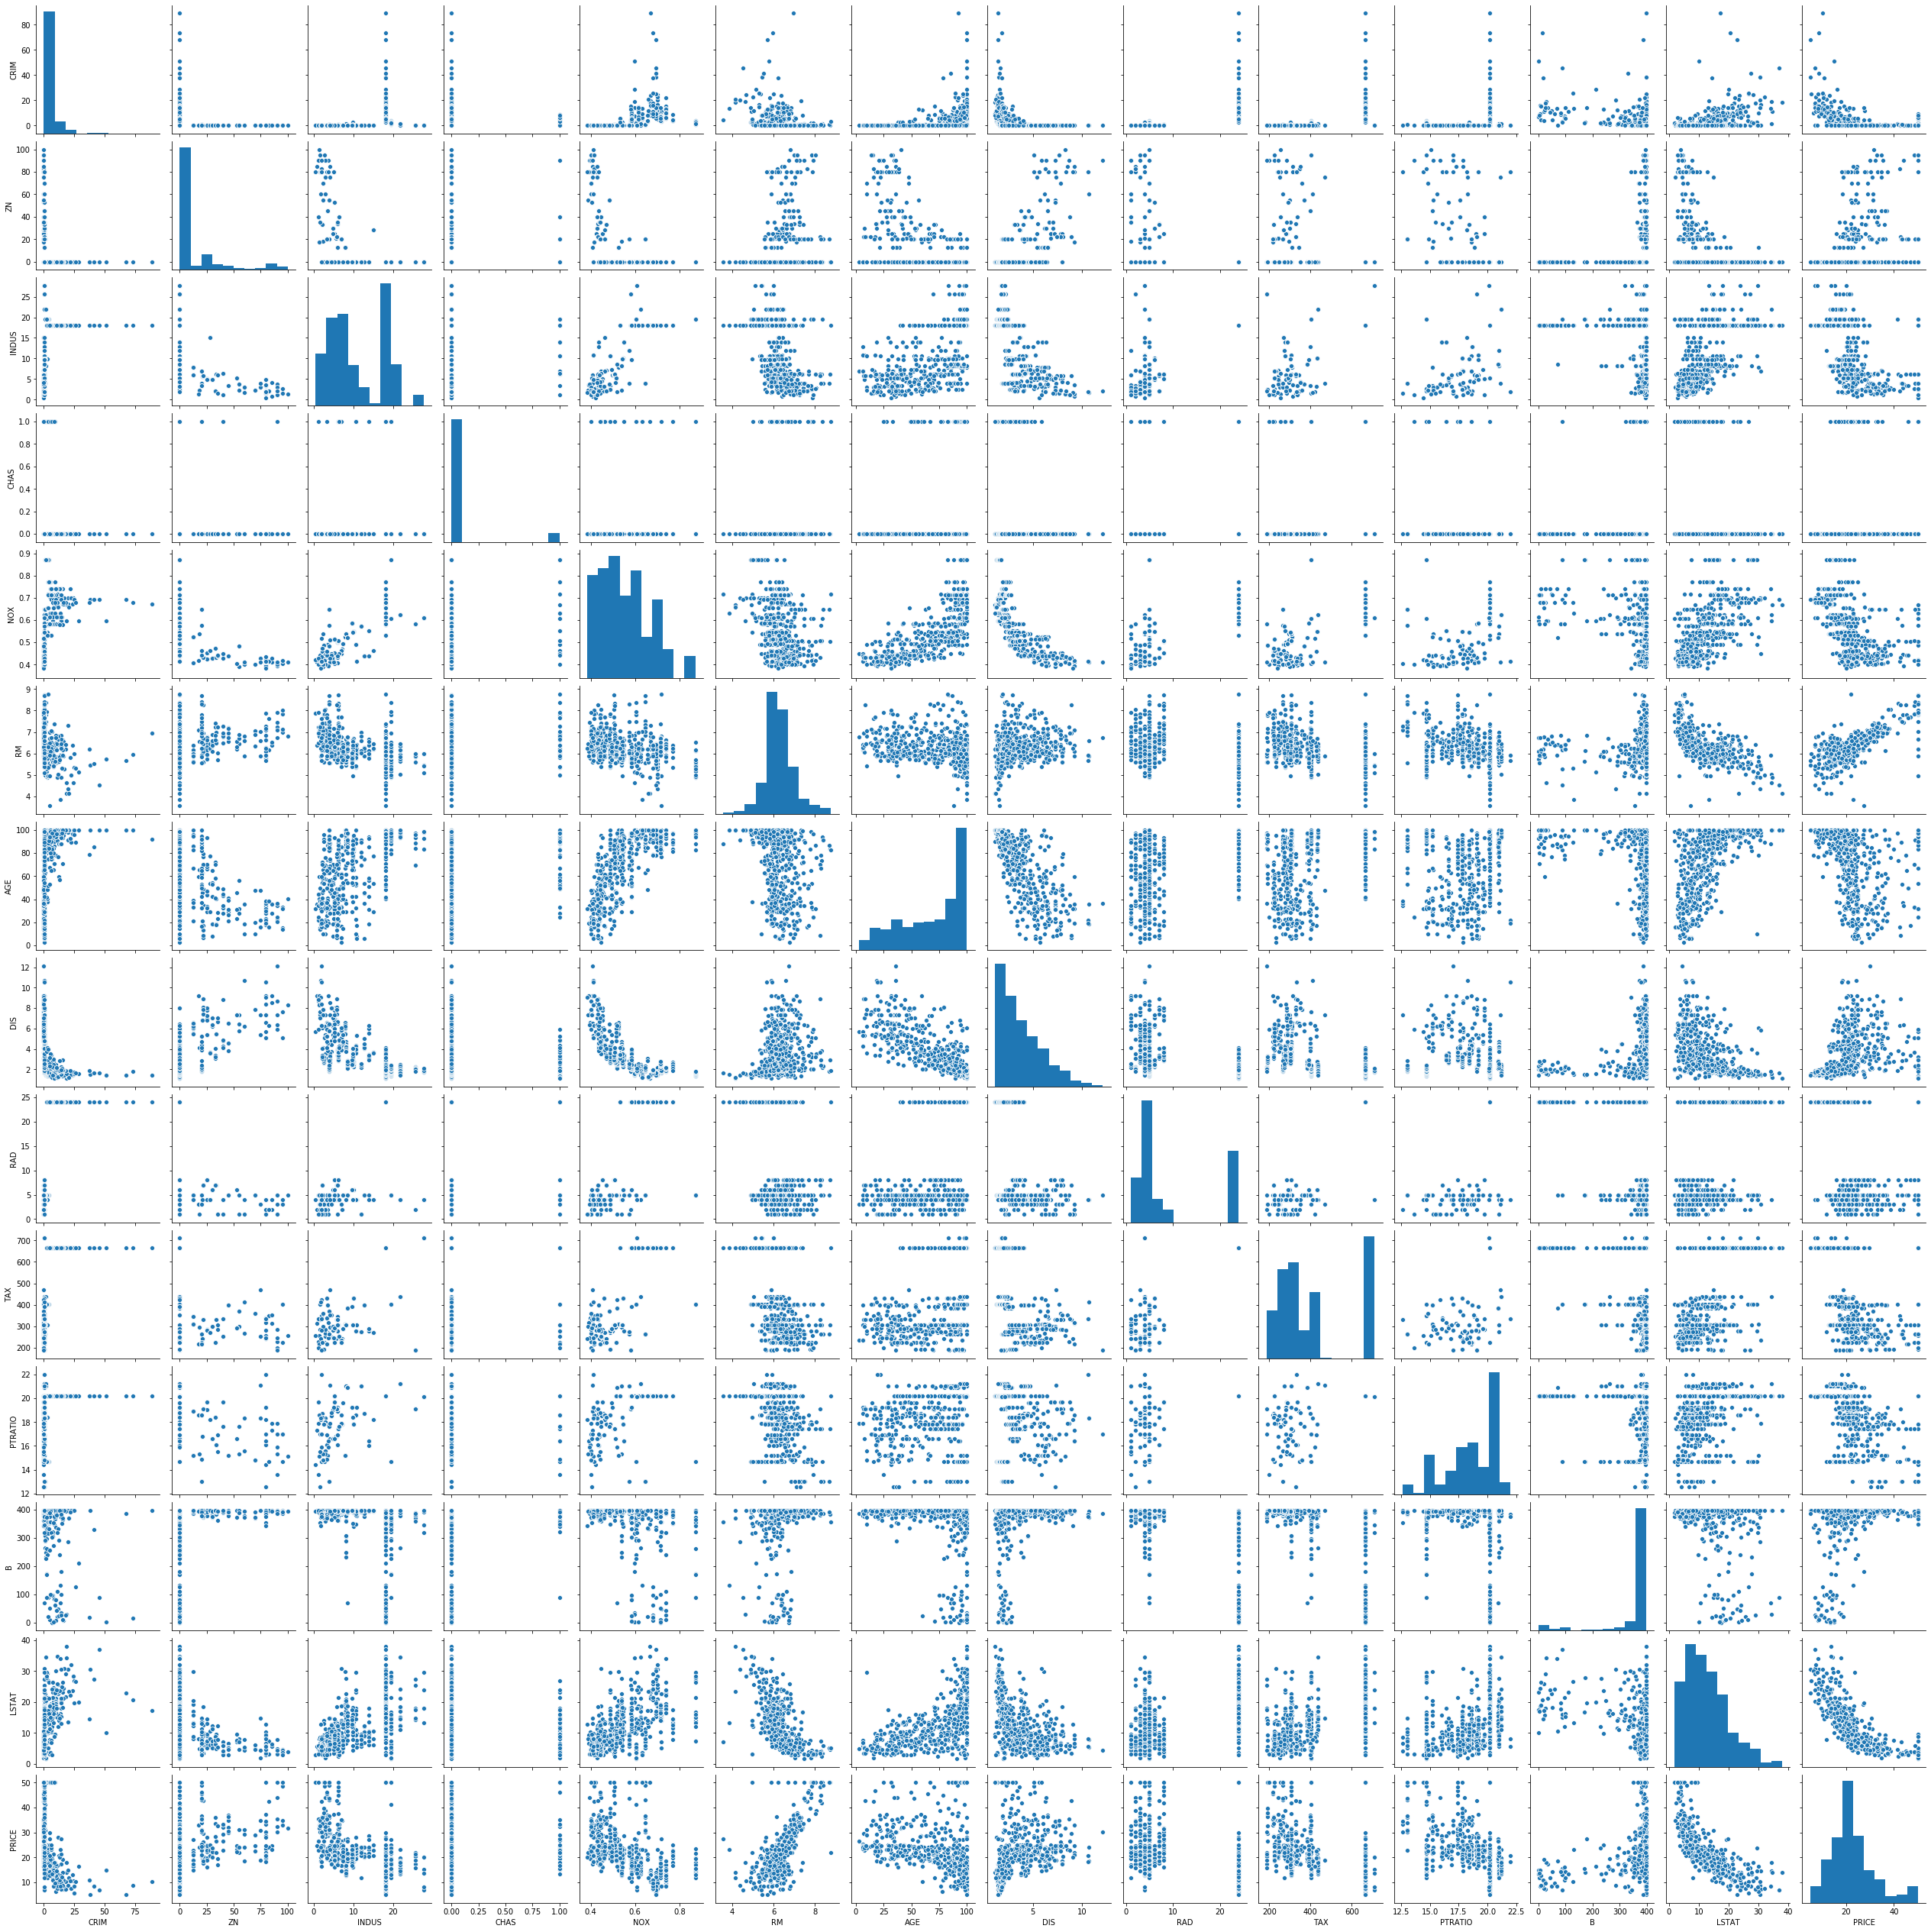

In [ ]:
# Scatter plot matrix using seaborn library
import seaborn as sns
sns.pairplot(df)
#sns.pairplot(df1)
plt.show()

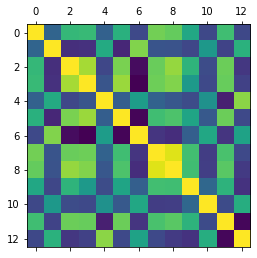

In [ ]:
# correlation matrix plot
corr = df.corr()
plt.matshow(corr)
plt.show()

Above plot is not meaningful without labels. So let's re-create above plot with labels.

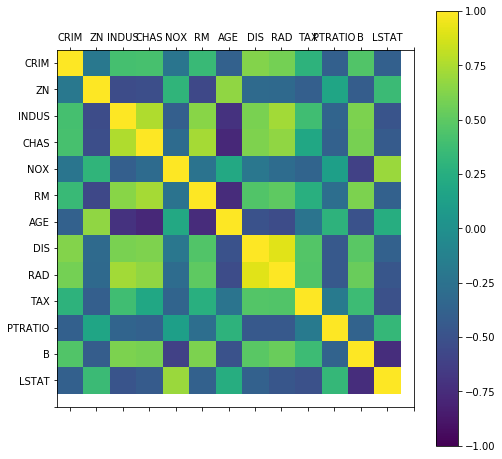

In [ ]:
#correlation matrix plot with labels
#fig = plt.figure(figsize=(20,20))
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)  # Same as (1,1,1) (nrows, ncols, element no.)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(boston.feature_names)
ax.set_yticklabels(boston.feature_names)
#fig.savefig('fig1.png', dpi = 300)
plt.show()

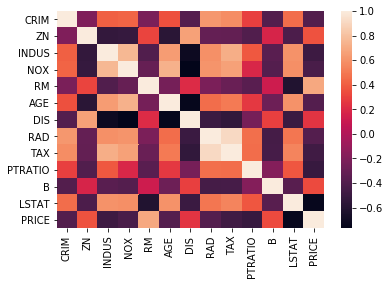

In [ ]:
#Using seaborn library to create same plot
#import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [ ]:
import pandas_profiling as pp
report=pp.profileReport(df)

AttributeError: module 'pandas_profiling' has no attribute 'profileReport'

# Splitting the Dataset into Train and Test Set

In [ ]:
#from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.25
trainingSet, testingSet = train_test_split(df, test_size = test_size, random_state = seed)

In [ ]:
trainingSet.shape , testingSet.shape , df.shape

((379, 14), (127, 14), (506, 14))

In [ ]:
# Using k-fold cv

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
kfold = KFold(n_splits=10, random_state=None)
model = LinearRegression()
#Complete it using KFold CV

# Model Building

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#Creating a simple linear model
lm = smf.ols(formula = "PRICE ~ RM ", data = trainingSet)
#lm = smf.ols("Price ~ RM ", data = trainingSet)
lm_result = lm.fit()
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     320.3
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.71e-52
Time:                        11:14:14   Log-Likelihood:                -1246.5
No. Observations:                 379   AIC:                             2497.
Df Residuals:                     377   BIC:                             2505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.8748      3.136    -10.802      0.0

In [ ]:
#A model including all the independent variables

model_1 = smf.ols(formula = """PRICE ~ CRIM + ZN + INDUS+ CHAS
                           + NOX + RM + AGE+ +DIS   
                           +  RAD + TAX + PTRATIO 
                           + B + LSTAT""", data = trainingSet)
result_1 = model_1.fit()
print(result_1.summary())
#print(result_1.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     87.74
Date:                Tue, 23 Jun 2020   Prob (F-statistic):          1.12e-103
Time:                        11:14:15   Log-Likelihood:                -1094.5
No. Observations:                 379   AIC:                             2217.
Df Residuals:                     365   BIC:                             2272.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      33.7158      5.687      5.928      

In [ ]:
# Considering model with only imp features(based on p-value)
model_2 = smf.ols('PRICE ~ CRIM +  RM + TAX + PTRATIO + B+ LSTAT' , data = trainingSet)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     150.6
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.54e-96
Time:                        12:37:30   Log-Likelihood:                -1129.5
No. Observations:                 379   AIC:                             2273.
Df Residuals:                     372   BIC:                             2301.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9486      4.637      1.930      0.0

In [ ]:
# Creating another model based on our simple logic(considering only highly correlated predictors)
model_3 = smf.ols('PRICE ~ LSTAT + RM  + TAX+ ZN' , data = trainingSet)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     183.0
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.08e-86
Time:                        11:59:11   Log-Likelihood:                -1157.6
No. Observations:                 379   AIC:                             2325.
Df Residuals:                     374   BIC:                             2345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3420      3.505      0.668      0.5

In [ ]:
#Calculating trainingset MSE/RMSE for model_2
y_hat2 = result_2.predict(trainingSet[['CRIM' ,'TAX'  , 'RM' , 'PTRATIO' , 'B' ,'LSTAT']])
train_MSE = np.mean(((trainingSet.PRICE - y_hat2)**2))
print("Training RMSE = ", np.sqrt(train_MSE))

Training RMSE =  4.76547649668933


In [ ]:
#USing inbuilt function
print("MSE = ", mean_squared_error(trainingSet.PRICE, y_hat2))
print("Training RMSE = ", np.sqrt(mean_squared_error(trainingSet.PRICE, y_hat2)))
print(result_2.mse_resid)  # MSE of residues
print("R_squared = ",result_2.rsquared)   # R_squared value
print("Adjusted R_squared = ",result_2.rsquared_adj)  # Adjusted R_Squared

MSE =  22.709766240498425
Training RMSE =  4.765476496689332
23.13710055147555
R_squared =  0.7083765051006191
Adjusted R_squared =  0.7036729003441775


In [ ]:
#TestSet MSE
yp_test = result_2.predict(testingSet[['CRIM' ,'TAX', 'ZN' , 'NOX' , 'RM', 'RAD' ,'DIS' , 'PTRATIO' , 'B' ,'LSTAT']])
test_MSE = np.mean(((testingSet.PRICE - yp_test)**2))
print("Testing RMSE is =", np.sqrt(test_MSE))

Testing RMSE is = 6.136622595337132


calcu of vif score :remove dependent/target variable,for i=1,2,3 iteration of 1 y is x1 .
y~df1,
Rsquare,
vif=1/1-Rsquare
the above 3 steps to calculate vif

In [ ]:
#Calculating VIF scores
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('PRICE ~ CRIM + ZN + NOX + RM + +DIS + RAD + TAX + PTRATIO + B+ LSTAT' , data = trainingSet, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif

[1.6862868545466878,
 2.2864898060580723,
 3.883121898246588,
 1.8302791982826772,
 3.531042511244832,
 7.034796794351109,
 7.390968370813757,
 1.7875357755436714,
 1.3471000283369674,
 2.5341928500682385]

In [ ]:
# Considering model with only imp features(based on p-value)
model_3 = smf.ols('PRICE ~ CRIM + ZN + NOX + RM + +DIS + RAD + PTRATIO + B+ LSTAT' , data = trainingSet)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     121.4
Date:                Tue, 23 Jun 2020   Prob (F-statistic):          1.43e-104
Time:                        12:26:02   Log-Likelihood:                -1102.2
No. Observations:                 379   AIC:                             2224.
Df Residuals:                     369   BIC:                             2264.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5816      5.694      5.371      0.0

In [ ]:
#Using user defined function to calculate VIF Score

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print( " VIF score for", xvar_names[i], "is:" , vif)

In [ ]:
trainingSet_num = trainingSet.drop(['RAD','NOX','CHAS'], axis = 1)
vif_cal(trainingSet_num, 'PRICE')

 VIF score for CRIM is: 1.58
 VIF score for ZN is: 2.31
 VIF score for INDUS is: 3.49
 VIF score for RM is: 1.87
 VIF score for AGE is: 3.09
 VIF score for DIS is: 3.79
 VIF score for TAX is: 2.87
 VIF score for PTRATIO is: 1.57
 VIF score for B is: 1.34
 VIF score for LSTAT is: 2.93


# Linearity & Equal variance

In [ ]:
#Residual Plots
#res2 = trainingSet.Price - y_hat2
#plt.plot(  y_hat2, res2,  'b.')

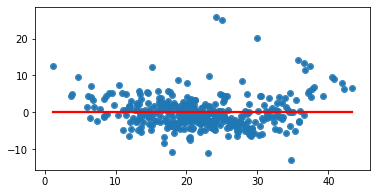

In [ ]:
#Diagnosis of Model
#Checking Linearity Assusmption and Constant Variance of Residual Terms

pred_val = result_2.fittedvalues.copy()
true_val = trainingSet['PRICE'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,3))
_ = ax.scatter(pred_val , residual, s = 10)
sns.regplot(pred_val, residual, order = 1, ci=None, line_kws={'color':'r'})
plt.show()

Above plot shows that, residuals have mean zero and approximate constant variance(significant influence of outliers is present).

# Normality

NameError: name 'residual' is not defined

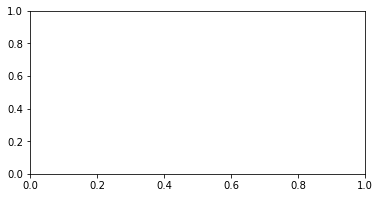

In [ ]:
#Checming Normality Condition
import scipy as sp
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

Its approximate to normal distribution. To confirm normality we can go for theoretical tests.

In [ ]:
#import statsmodels.api as sm
#sm.graphics.plot_leverage_resid2(result_3)

NameError: name 'result_3' is not defined

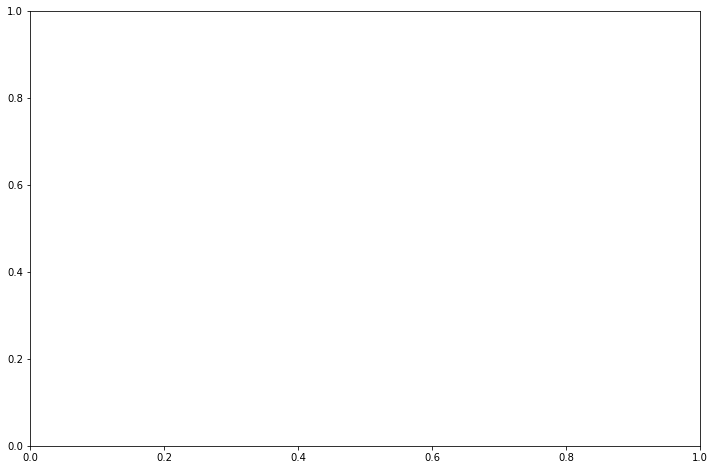

In [ ]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(result_3, ax=ax, criterion="cooks")

We can see there are many worrisome observations. For example obs no. 364, 368, 369, 371 has low leverage but a large residual; obs no. 380, 418 has small residual and large leverage. Observations having large residuals are outliers.
**ROUGH guidelines for “large”: Based on normality, |studres| > 2 is considered “large”.

# Using Sci-kit Learn

In [ ]:
#X = trainingSet[['LSTAT', 'RM', 'NOX', 'PTRATIO']].as_matrix()
X = TrainingSet[['LSTAT', 'RM', 'NOX']].as_matrix()
y = TrainingSet.PRICE
model_4 = LinearRegression()
result = model_4.fit(X, y)
print(result.intercept_, result.coef_)
print(result.score(X, y))

NameError: name 'TrainingSet' is not defined

In [ ]:
X_new = df.drop(['PRICE'], axis = 1).as_matrix()
y_new = df.PRICE
X_new_train , X_new_test , y_new_train , y_new_test = train_test_split(X_new, y_new, test_size = 0.3 , random_state = 10)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [ ]:
X_new_train.shape , X_new_test.shape

In [ ]:
#Model training
model = LinearRegression()
result = model.fit(X_new_train, y_new_train)

In [ ]:
train_MSE = np.mean((y_new_train - result.predict(X_new_train))**2)

In [ ]:
test_MSE = np.mean((y_new_test - result.predict(X_new_test))**2)

In [ ]:
print(np.sqrt(train_MSE))
print(np.sqrt(test_MSE))

In [ ]:
result.score(X_new_train, y_new_train)

In [ ]:
to remove out liers we use inter quartile range

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,6.32e-03,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1.0,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2.0,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0.0,0.47,7.18,61.1,4.97,2.0,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3.0,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6.26e-02,0.0,11.93,0.0,0.57,6.59,69.1,2.48,1.0,273.0,21.0,391.99,9.67,22.4
502,4.53e-02,0.0,11.93,0.0,0.57,6.12,76.7,2.29,1.0,273.0,21.0,396.90,9.08,20.6
503,6.08e-02,0.0,11.93,0.0,0.57,6.98,91.0,2.17,1.0,273.0,21.0,396.90,5.64,23.9
504,1.10e-01,0.0,11.93,0.0,0.57,6.79,89.3,2.39,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.60
ZN          12.50
INDUS       12.91
NOX          0.17
RM           0.74
AGE         49.05
DIS          3.09
RAD         20.00
TAX        387.00
PTRATIO      2.80
B           20.85
LSTAT       10.01
PRICE        7.98
dtype: float64


In [ ]:
df.CHAS =df.CHAS.astype('int32')

In [ ]:
df_out = df[~((df < (Q1 - 1.5* IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_out.shape

(288, 14)

In [ ]:
x=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [ ]:
y=np.array([1,4,9,16,25,36,49,64,81,100,121,144,169,196,225])

In [ ]:
plt.scatter(x,y)

In [ ]:
df1=pd.DataFrame({'X':x,'Y':y})
df1

In [ ]:
df1.corr(method='spearman')# when ever to compare two continous variables then rank should be find 